<a href="https://colab.research.google.com/github/deepu8900/Calories_Burnt_prediction/blob/main/Calorie_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [28]:
dataset = pd.read_csv('/content/calories.csv')

In [29]:
dataset.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [30]:
exercise_dataset = pd.read_csv('/content/exercise.csv')
exercise_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [31]:
calories_dataset = pd.concat([exercise_dataset, dataset['Calories']], axis=1)
calories_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [32]:
calories_dataset.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [33]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

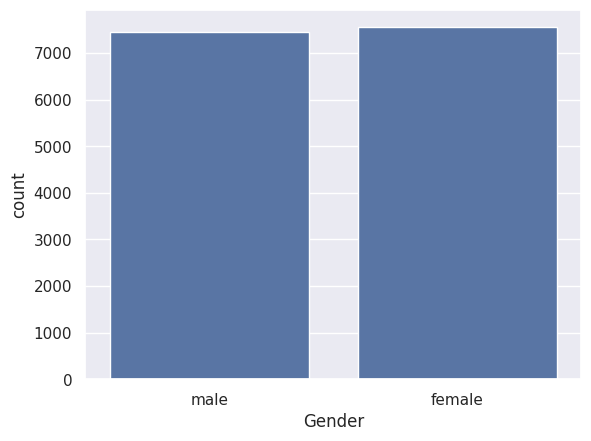

In [34]:
sns.countplot(x='Gender', data=calories_dataset)

/tmp/ipython-input-1686727235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_dataset['Age'])


<Axes: xlabel='Age', ylabel='Density'>

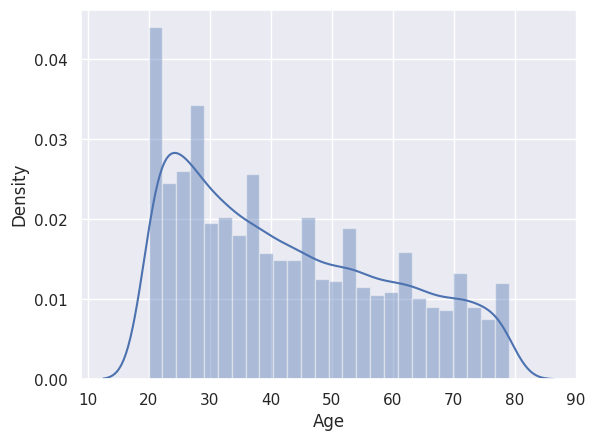

In [35]:
sns.distplot(calories_dataset['Age'])

/tmp/ipython-input-2462841884.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_dataset['Height'])


<Axes: xlabel='Height', ylabel='Density'>

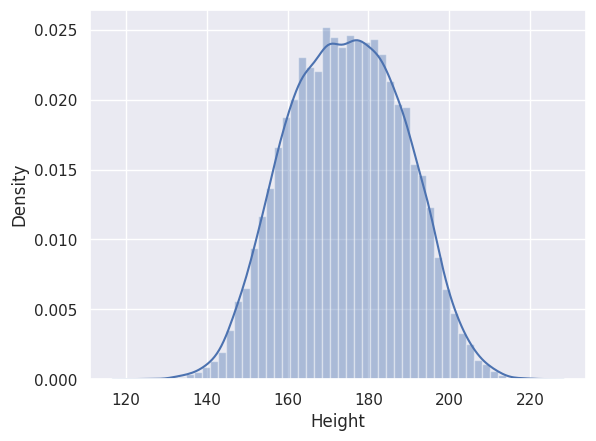

In [36]:
sns.distplot(calories_dataset['Height'])

/tmp/ipython-input-1070014704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_dataset['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

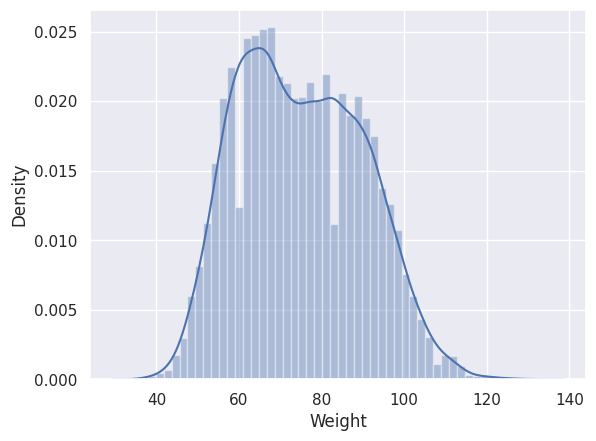

In [37]:
sns.distplot(calories_dataset['Weight'])

/tmp/ipython-input-3543829301.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_dataset['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

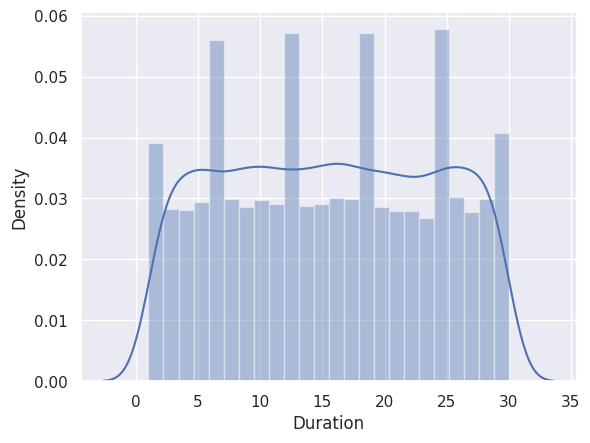

In [38]:
sns.distplot(calories_dataset['Duration'])

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataframe = encoder.fit_transform(calories_dataset['Gender'])
calories_dataset['Gender'] = dataframe
calories_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

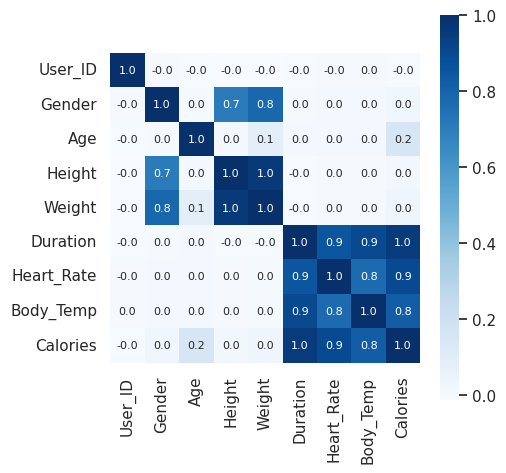

In [40]:
correlation = calories_dataset.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [41]:
x = calories_dataset.drop(columns=['User_ID', 'Calories'], axis=1)
y = calories_dataset['Calories']

In [42]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.2, random_state=2)

In [43]:
model = XGBRegressor()

In [47]:
model.fit(xtrain, ytrain)
train_prediction = model.predict(xtrain)
print(train_prediction)
mae = metrics.mean_absolute_error(ytrain, train_prediction)
print(mae)

[ 11.680271  36.71814   31.747328 ... 108.05978  179.23735   44.236874]
0.9322033420062313


In [48]:
model.fit(xtest, ytest)
test_prediction = model.predict(xtest)
print(test_prediction)
mae = metrics.mean_absolute_error(ytest, test_prediction)
print(mae)

[126.3918   224.30106   37.246567 ... 145.44115   23.812109  88.0905  ]
0.5868287096619607
